# Accidents in New Jersey

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('accidents.csv',
                 encoding = "ISO-8859-1")

D:\A\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


- About warning:


    - This dtype error happens when a column has both strings and integer values.
    
    
    - ignore it first, I will fix it later.

## Data Preparation and Cleaning

In [3]:
df.columns

Index(['case code', ' County Name', ' Municipality Name', ' Crash Date',
       ' Crash Day Of Week', ' Crash Time', ' Police Dept Code',
       ' Police Department', ' Police Station', ' Total Killed',
       ' Total Injured', ' Pedestrians Killed', ' Pedestrians Injured',
       ' Severity', ' Intersection', ' Alcohol Involved', ' HazMat Involved',
       ' Crash Type Code', ' Total Vehicles Involved', ' Crash Location',
       ' Location Direction', ' Route', ' Route Suffix',
       ' SRI (Std Rte Identifier)', ' MilePost  ', ' Road System',
       ' Road Character', ' Road Surface Type', ' Surface Condition',
       ' Light Condition', ' Environmental Condition', ' Road Divided By',
       ' Temporary Traffic Control Zone', ' Distance To Cross Street',
       ' Unit Of Measurement', ' Directn From Cross Street',
       ' Cross Street Name', ' Is Ramp', ' Ramp To/From Route Name',
       ' Ramp To/From Route Direction', ' Posted Speed',
       ' Posted Speed Cross Street', ' Latitud

> Bummer. There's our first problem. Notice that there's a leading space in every column header. We should take it out.

In [4]:
# address empty spaces on column headers
df.rename(columns = lambda x: x.strip(),
          inplace=True)

In [5]:
df.describe()

,Total Killed,Total Injured,Pedestrians Killed,Pedestrians Injured,Total Vehicles Involved,Road System,Posted Speed
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.965525e-03,3.119510e-01,4.854207e-04,1.735117e-02,1.875997e+00,5.199488e+00,3.120711e+01
std,4.694568e-02,7.015340e-01,2.211335e-02,1.344480e-01,5.416507e-01,2.491480e+00,1.790289e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,2.500000e+01
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,5.000000e+00,2.500000e+01
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,7.000000e+00,4.500000e+01
max,5.000000e+00,4.200000e+01,2.000000e+00,1.000000e+01,2.000000e+01,1.000000e+01,9.900000e+01


### 1. County Name + Crash Day of Week

In [6]:
df['County Name'].describe()

count          1048575
unique              21
top       MIDDLESEX   
freq            115760
Name: County Name, dtype: object

#### Analysis:

- There are 21 unique values in the County Name column (for the 21 counties in New Jersey).

- We can see that the **top county with the most rows** is **Middlesex** County with 176,402 crashes???????.

> Let's find out the names of the counties in New Jersey.

In [7]:
df['County Name'].unique()

array(['ATLANTIC    ', 'BERGEN      ', 'BURLINGTON  ', 'CAMDEN      ',
       'CAPE MAY    ', 'CUMBERLAND  ', 'ESSEX       ', 'GLOUCESTER  ',
       'HUDSON      ', 'HUNTERDON   ', 'MERCER      ', 'MIDDLESEX   ',
       'MONMOUTH    ', 'MORRIS      ', 'OCEAN       ', 'PASSAIC     ',
       'SALEM       ', 'SOMERSET    ', 'SUSSEX      ', 'UNION       ',
       'WARREN      '], dtype=object)

- Looks like we're going to need to strip out the spaces out of the these county names.

> This time we'll use the **map()** function which will strip the white space out of every string found in the column.

In [8]:
df['County Name'] = df['County Name'].map(str.strip)
# will address empty spaces on each cell
df['County Name'].unique()

array(['ATLANTIC', 'BERGEN', 'BURLINGTON', 'CAMDEN', 'CAPE MAY',
       'CUMBERLAND', 'ESSEX', 'GLOUCESTER', 'HUDSON', 'HUNTERDON',
       'MERCER', 'MIDDLESEX', 'MONMOUTH', 'MORRIS', 'OCEAN', 'PASSAIC',
       'SALEM', 'SOMERSET', 'SUSSEX', 'UNION', 'WARREN'], dtype=object)

In [9]:
df['Crash Day Of Week'].unique()

array(['TU', 'F ', 'M ', 'TH', 'SA', 'S ', 'W ', ' W', ' M', ' S', ' F'],
      dtype=object)

In [10]:
df['Crash Day Of Week'] = df['Crash Day Of Week'].map(str.strip)

df['Crash Day Of Week'].unique()

array(['TU', 'F', 'M', 'TH', 'SA', 'S', 'W'], dtype=object)

## 2. Police Dept Code + Crash Type Code

> Let's fix that dtype error we got at the beginning of the exercise.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 47 columns):
 #   Column                          Non-Null Count    Dtype 
---  ------                          --------------    ----- 
 0   case code                       1048575 non-null  object
 1   County Name                     1048575 non-null  object
 2   Municipality Name               1048575 non-null  object
 3   Crash Date                      1048575 non-null  object
 4   Crash Day Of Week               1048575 non-null  object
 5   Crash Time                      1048575 non-null  object
 6   Police Dept Code                1048575 non-null  object
 7   Police Department               1048575 non-null  object
 8   Police Station                  1048575 non-null  object
 9   Total Killed                    1048575 non-null  int64 
 10  Total Injured                   1048575 non-null  int64 
 11  Pedestrians Killed              1048575 non-null  int64 
 12  Pedestrians In

- The warning at the beginning said it was **column 6** that had **mixed dtypes**. If we look at our column list and count to the sixth column (Remember to count from zero!), we'll see that it's the **Police Dept Code** column. Let's look at every unique value in that column.

In [12]:
df['Police Dept Code'].unique()

array(['1', '99', '  ', '2', '3', '4', 1, 99, 2, 3, 4], dtype=object)

* And there it is! We can see, there are strings and integers mixed together in the same column.

- We also can find the same situation in column 17(“Crash Type Code”).

In [13]:
df['Crash Type Code'].unique()

array(['2', '8', '1', '6', '11', '5', '3', '13', '7', '99', '15', '14',
       '10', '4', '12', '9', '16', '  ', '0'], dtype=object)

> Let's fix that by changing every value in both columns to a string using the astype() function.

In [14]:
df['Police Dept Code'] = df['Police Dept Code'].astype(str)

df['Crash Type Code'] = df['Crash Type Code'].astype(str)

- We're changing it to a string because we don't need to do math with these numbers since they are codes so it's more beneficial to use them as objects.



- If you wanted to change something to an integer or a float, you'll need to use **astype(int)** and **astype(float)** respectively.

> Let's make the dataframe a little bit more manageable by weeding out some unnecessary columns.

- So we have to create a new dataframe called accidents.

In [15]:
accidents = df[['County Name',
                'Municipality Name',
                'Crash Date',
                'Crash Day Of Week',
                'Crash Time',
                'Crash Location',
                'Total Killed',
                'Total Injured',
                'Pedestrians Killed',
                'Pedestrians Injured',
                'Severity',
                'Total Vehicles Involved',
                'Alcohol Involved',
                'Cell Phone In Use Flag']]

## 3. How many car accidents had alcohol involved?

## What about  Cell Phone In Use Flag?

> Let's find out the unique values that come up in the column Alcohol Involved.

In [16]:
accidents['Alcohol Involved'].unique()

array(['N', 'Y'], dtype=object)

- It has only two unique values in the column: N for no and Y for yes.


- Use function **value_counts()** to calculate the number of Ns & Ys.

In [17]:
accidents['Alcohol Involved'].value_counts()

N    1017766
Y      30809
Name: Alcohol Involved, dtype: int64

- A lot more Ns than Ys. But just what percentage are the Ys compared to the Ns?

In [18]:
accidents['Alcohol Involved'].count()

1048575

#### Attention : The count() function doesn't count NAs or null values.


- Always make sure to check NAs using the isnull() function, followed by sum()

In [19]:
accidents['Alcohol Involved'].isnull().sum()

0

In [20]:
Alcohol_Involved = pd.DataFrame(accidents['Alcohol Involved'].value_counts())

In [21]:
Alcohol_Involved['Percentage'] = Alcohol_Involved['Alcohol Involved'] / accidents['Alcohol Involved'].count() * 100

Alcohol_Involved

,Alcohol Involved,Percentage
N,1017766,97.061822
Y,30809,2.938178


#### Analysis:


- We still can see that 2.93% people(almost 3%) broke the driving law because they chose to drive after drinking. The absolute number of accidents alcohol involved is also very high, reaching more than 30,000.

In [22]:
accidents['Cell Phone In Use Flag'].unique()

array(['N', 'Y'], dtype=object)

In [23]:
accidents['Cell Phone In Use Flag'].value_counts()

N    1038918
Y       9657
Name: Cell Phone In Use Flag, dtype: int64

In [24]:
accidents['Cell Phone In Use Flag'].count()

1048575

In [25]:
accidents['Cell Phone In Use Flag'].isnull().sum()

0

In [26]:
Cell_Phone = pd.DataFrame(accidents['Cell Phone In Use Flag'].value_counts())

In [27]:
Cell_Phone['Percentage'] = Cell_Phone['Cell Phone In Use Flag'] / accidents['Cell Phone In Use Flag'].count() * 100

Cell_Phone

,Cell Phone In Use Flag,Percentage
N,1038918,99.079036
Y,9657,0.920964


#### Analysis:


- We can see that only 0.92% people(almost 1%) broke the driving law because they chose to use cell phones when they are driving.

## 4. How many total people were killed in every county?

In [28]:
# the numer of accidents reported in each county

accidents['County Name'].value_counts()

MIDDLESEX     115760
ESSEX         112580
BERGEN        112521
HUDSON         78693
CAMDEN         64739
MONMOUTH       64637
UNION          59556
PASSAIC        56494
MERCER         55008
OCEAN          53104
MORRIS         49096
BURLINGTON     45010
SOMERSET       36621
ATLANTIC       35130
GLOUCESTER     31940
CUMBERLAND     18876
HUNTERDON      16441
CAPE MAY       13198
SUSSEX         12587
WARREN         11123
SALEM           5461
Name: County Name, dtype: int64

> First, let's split up every incident that happened in every county by using the groupby() function.

> Combine with sum() function to get total result.

In [29]:
county_level_accidents = accidents.groupby('County Name').sum()

county_level_accidents = county_level_accidents.reset_index()

county_level_accidents

,County Name,Total Killed,Total Injured,Pedestrians Killed,Pedestrians Injured,Total Vehicles Involved
0,ATLANTIC,117,13518,23,728,64147
1,BERGEN,101,31706,42,2136,215278
2,BURLINGTON,161,15285,28,398,81956
3,CAMDEN,173,24909,45,1102,122872
4,CAPE MAY,32,4206,1,172,23761
5,CUMBERLAND,99,7296,9,226,33571
6,ESSEX,170,39627,63,3511,216820
7,GLOUCESTER,102,11442,17,342,57627
8,HUDSON,87,19842,32,2675,154819
9,HUNTERDON,40,3997,9,59,27295


In [30]:
total_death = pd.DataFrame(county_level_accidents[['County Name',
                                                   'Total Killed']].sort_values(by='Total Killed',
                                                                                ascending=False))

total_death

,County Name,Total Killed
11,MIDDLESEX,182
3,CAMDEN,173
6,ESSEX,170
2,BURLINGTON,161
14,OCEAN,160
12,MONMOUTH,131
0,ATLANTIC,117
19,UNION,110
7,GLOUCESTER,102
1,BERGEN,101


## 5. Let's look at time of accidents, like "Crash Date", "Crash Day Of Week" and "Crash Time".

In [31]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column                   Non-Null Count    Dtype 
---  ------                   --------------    ----- 
 0   County Name              1048575 non-null  object
 1   Municipality Name        1048575 non-null  object
 2   Crash Date               1048575 non-null  object
 3   Crash Day Of Week        1048575 non-null  object
 4   Crash Time               1048575 non-null  object
 5   Crash Location           1048575 non-null  object
 6   Total Killed             1048575 non-null  int64 
 7   Total Injured            1048575 non-null  int64 
 8   Pedestrians Killed       1048575 non-null  int64 
 9   Pedestrians Injured      1048575 non-null  int64 
 10  Severity                 1048575 non-null  object
 11  Total Vehicles Involved  1048575 non-null  int64 
 12  Alcohol Involved         1048575 non-null  object
 13  Cell Phone In Use Flag   1048575 non-null  object
dtypes:

> We notice that the dates on the 'Crash Date' are strings and not Python date objects.

In [32]:
from datetime import datetime

import datetime as dt

In [33]:
accidents['Crash Date']= pd.to_datetime(accidents['Crash Date'])

<ipython-input-33-5a4f1440300c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents['Crash Date']= pd.to_datetime(accidents['Crash Date'])


In [34]:
accidents['Crash Date']

0         2008-03-04
1         2008-12-19
2         2008-11-25
3         2008-03-31
4         2008-01-25
             ...    
1048570   2011-07-21
1048571   2011-07-21
1048572   2011-07-21
1048573   2011-07-22
1048574   2011-07-22
Name: Crash Date, Length: 1048575, dtype: datetime64[ns]

In [35]:
accidents['Crash Time'] = accidents['Crash Time'].astype(str)

accidents['Crash Time'] = [i[:2] if len(i) == 4 else i[0] for i in df['Crash Time']]

<ipython-input-35-1c29c01b97e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents['Crash Time'] = accidents['Crash Time'].astype(str)
<ipython-input-35-1c29c01b97e9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents['Crash Time'] = [i[:2] if len(i) == 4 else i[0] for i in df['Crash Time']]


In [36]:
accidents['year'] = accidents['Crash Date'].dt.year
accidents['month'] = accidents['Crash Date'].dt.month

<ipython-input-36-4f0dac79ec64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents['year'] = accidents['Crash Date'].dt.year
<ipython-input-36-4f0dac79ec64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents['month'] = accidents['Crash Date'].dt.month


In [37]:
accidents

,County Name,Municipality Name,Crash Date,Crash Day Of Week,Crash Time,Crash Location,Total Killed,Total Injured,Pedestrians Killed,Pedestrians Injured,Severity,Total Vehicles Involved,Alcohol Involved,Cell Phone In Use Flag,year,month
0,ATLANTIC,ABSECON CITY,2008-03-04,TU,15,US 30 ...,0,0,0,0,P,2,N,N,2008,3
1,ATLANTIC,ABSECON CITY,2008-12-19,F,11,US 30 ...,0,0,0,0,P,2,N,N,2008,12
2,ATLANTIC,ABSECON CITY,2008-11-25,TU,3,AUSECON TRAIL STATE ...,0,0,0,0,P,2,N,N,2008,11
3,ATLANTIC,ABSECON CITY,2008-03-31,M,1,423 RT 130 NORTH ...,0,0,0,0,P,2,N,N,2008,3
4,ATLANTIC,ABSECON CITY,2008-01-25,F,9,ATLANTIC COUNTY 685 ...,0,1,0,0,I,2,N,N,2008,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,MIDDLESEX,WOODBRIDGE TWP,2011-07-21,TH,16,US 9 ...,0,0,0,0,P,1,N,N,2011,7
1048571,MIDDLESEX,WOODBRIDGE TWP,2011-07-21,TH,17,US 9 ...,0,0,0,0,P,2,N,N,2011,7
1048572,MIDDLESEX,WOODBRIDGE TWP,2011-07-21,TH,18,ROUTE 514 ...,0,0,0,0,P,2,N,N,2011,7
1048573,MIDDLESEX,WOODBRIDGE TWP,2011-07-22,F,7,535 AMBOY AVE ...,0,0,0,0,P,2,N,N,2011,7


In [38]:
# save the above dataframes into a new csv

accidents.to_csv('Accidents_in_New_Jersey.csv')

## 6. Visualization


### ① Let's find the total death in every county.

Text(0, 0.5, 'County Name')

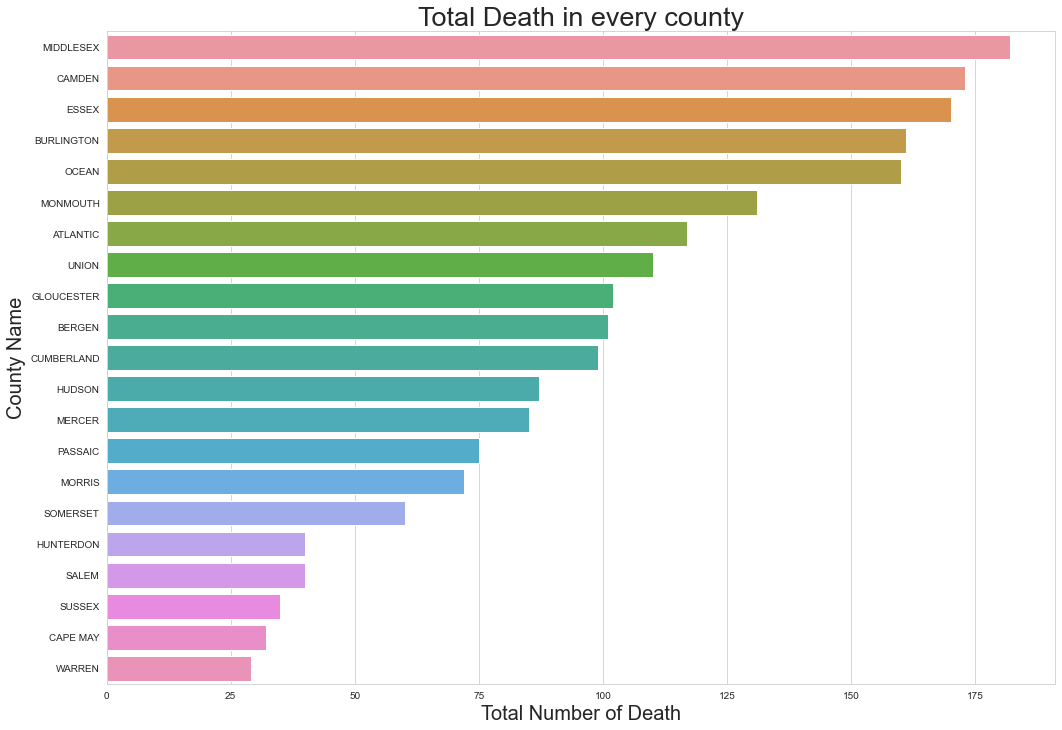

In [39]:
sns.set_style('whitegrid')
plt.figure(figsize=(17,12))

sns.barplot(x = total_death['Total Killed'],
            y = total_death['County Name'])

plt.title('Total Death in every county', fontsize=27)
plt.xlabel('Total Number of Death', fontsize=20)
plt.ylabel('County Name', fontsize=20)

### ② similar with ①，Let's find the total injured in every county.

In [39]:
total_injured = county_level_accidents[['County Name',
                                        'Total Injured']].sort_values(by='Total Injured',
                                                                      ascending=False)
total_injured

,County Name,Total Injured
6,ESSEX,39627
11,MIDDLESEX,34548
1,BERGEN,31706
3,CAMDEN,24909
8,HUDSON,19842
19,UNION,19700
12,MONMOUTH,18713
15,PASSAIC,18293
14,OCEAN,17508
2,BURLINGTON,15285


Text(0, 0.5, 'County Name')

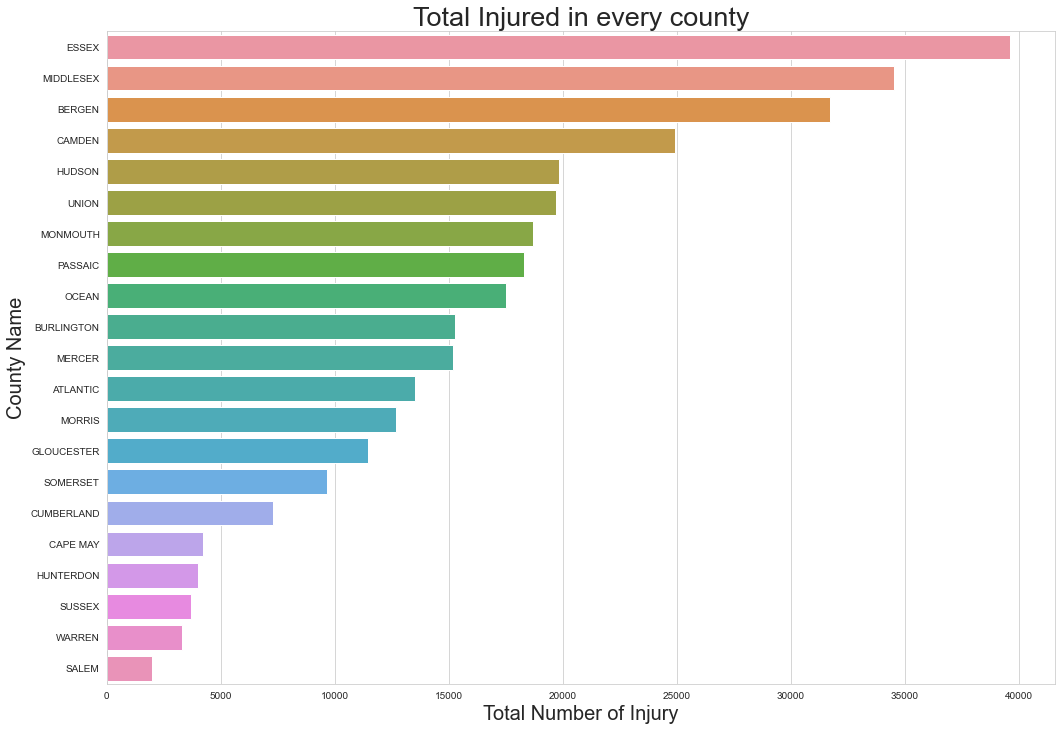

In [40]:
sns.set_style('whitegrid')
plt.figure(figsize=(17,12))

sns.barplot(x = total_injured['Total Injured'],
            y = total_injured['County Name'])

plt.title('Total Injured in every county', fontsize=27)
plt.xlabel('Total Number of Injury', fontsize=20)
plt.ylabel('County Name', fontsize=20)

### ③ Let's use scatter plot to take a look at the relationships between Total Killed and Pedestrians Killed in each county.

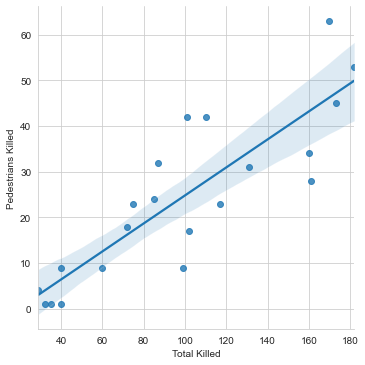

In [42]:
sns.lmplot(x='Total Killed',
           y='Pedestrians Killed',
           data=county_level_accidents)

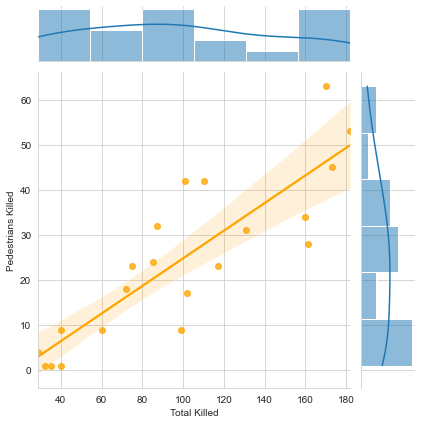

In [43]:
sns.jointplot(x='Total Killed',
              y='Pedestrians Killed',
              data=county_level_accidents,
              kind='reg',
              joint_kws={'color':'orange'})

### ④ similar with ③，Let's use scatter plot to take a look at the relationships between total injured and Pedestrians Injured.

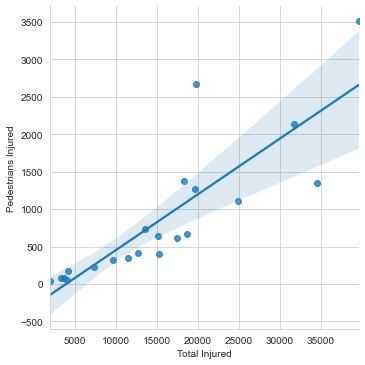

In [44]:
sns.lmplot(x='Total Injured',
           y='Pedestrians Injured',
           data=county_level_accidents)

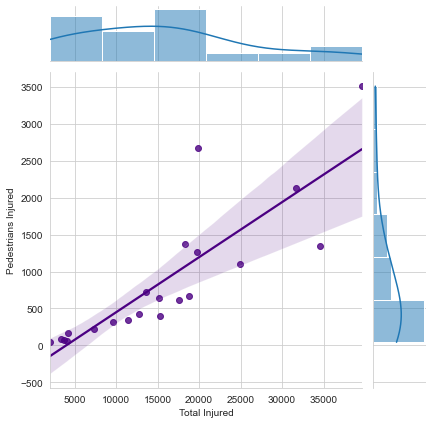

In [45]:
sns.jointplot(x='Total Injured',
              y='Pedestrians Injured',
              data=county_level_accidents,
              kind='reg',
              joint_kws={'color':'indigo'})

### ⑤ Total Vehicles Involved

In [46]:
Total_Vehicles_Involved = county_level_accidents[['County Name',
                                                  'Total Vehicles Involved']].sort_values(by='Total Vehicles Involved',
                                                                                          ascending=False)
Total_Vehicles_Involved

,County Name,Total Vehicles Involved
11,MIDDLESEX,220625
6,ESSEX,216820
1,BERGEN,215278
8,HUDSON,154819
3,CAMDEN,122872
12,MONMOUTH,119327
19,UNION,114766
15,PASSAIC,107298
10,MERCER,103554
14,OCEAN,98809


Text(0, 0.5, 'County Name')

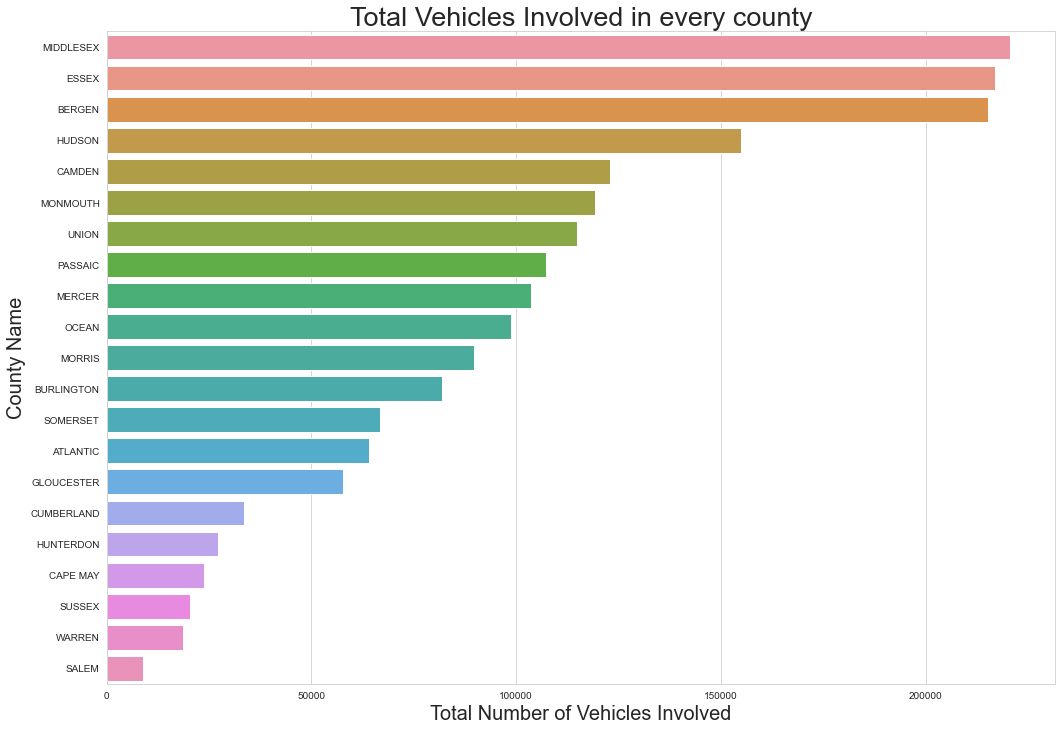

In [47]:
sns.set_style('whitegrid')
plt.figure(figsize=(17,12))

sns.barplot(x = Total_Vehicles_Involved['Total Vehicles Involved'],
            y = Total_Vehicles_Involved['County Name'])

plt.title('Total Vehicles Involved in every county', fontsize=27)
plt.xlabel('Total Number of Vehicles Involved', fontsize=20)
plt.ylabel('County Name', fontsize=20)

#### ⑥ Look at some figures related to time.

In [48]:
crash_date = accidents[['County Name',
                        'Crash Date',
                        'Crash Day Of Week',
                        'Crash Time',
                        'year',
                        'month']]
crash_date

,County Name,Crash Date,Crash Day Of Week,Crash Time,year,month
0,ATLANTIC,2008-03-04,TU,15,2008,3
1,ATLANTIC,2008-12-19,F,11,2008,12
2,ATLANTIC,2008-11-25,TU,3,2008,11
3,ATLANTIC,2008-03-31,M,1,2008,3
4,ATLANTIC,2008-01-25,F,9,2008,1
...,...,...,...,...,...,...
1048570,MIDDLESEX,2011-07-21,TH,16,2011,7
1048571,MIDDLESEX,2011-07-21,TH,17,2011,7
1048572,MIDDLESEX,2011-07-21,TH,18,2011,7
1048573,MIDDLESEX,2011-07-22,F,7,2011,7


### Year

In [49]:
Year = pd.DataFrame(crash_date['year'].value_counts().reset_index())

Year.columns = ['year','total_accidents']

Year = Year.sort_values(by='year',
                        ascending=True)

Year

,year,total_accidents
0,2008,303013
2,2009,270729
1,2010,299575
3,2011,175258


Text(0, 0.5, 'Total Accidents')

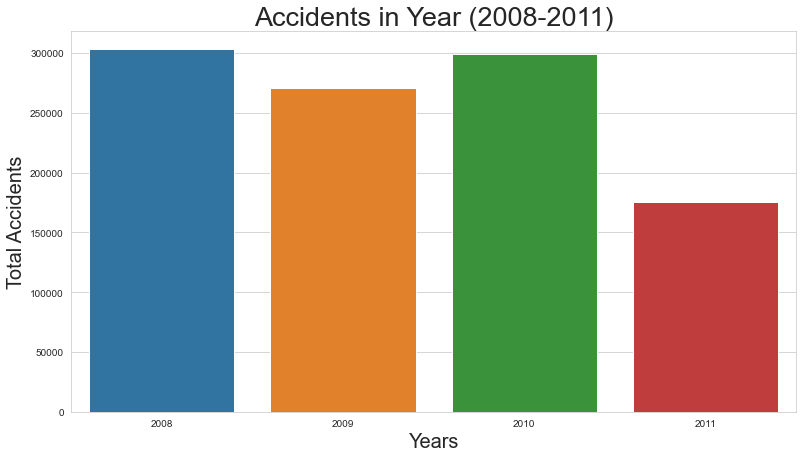

In [50]:
sns.set_style('whitegrid')
plt.figure(figsize=(13,7))

sns.barplot(x='year',
            y='total_accidents',
            data=Year)

plt.title('Accidents in Year (2008-2011)', fontsize=27)
plt.xlabel('Years', fontsize=20)
plt.ylabel('Total Accidents', fontsize=20)

## Month

In [51]:
month_order = ['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [52]:
month = pd.DataFrame(crash_date['month'].value_counts()).reset_index()


month.columns = ['month','accidents']


month = month.sort_values(by='month')


month['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],
                       ['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
                       inplace=True)

month

,month,accidents
4,Jan,89148
8,Feb,82671
10,Mar,82041
7,Apr,82854
1,May,93419
3,Jun,91628
5,Jul,86398
9,Aug,82274
11,Sep,81982
2,Oct,91753


Text(0, 0.5, 'Total Accidents')

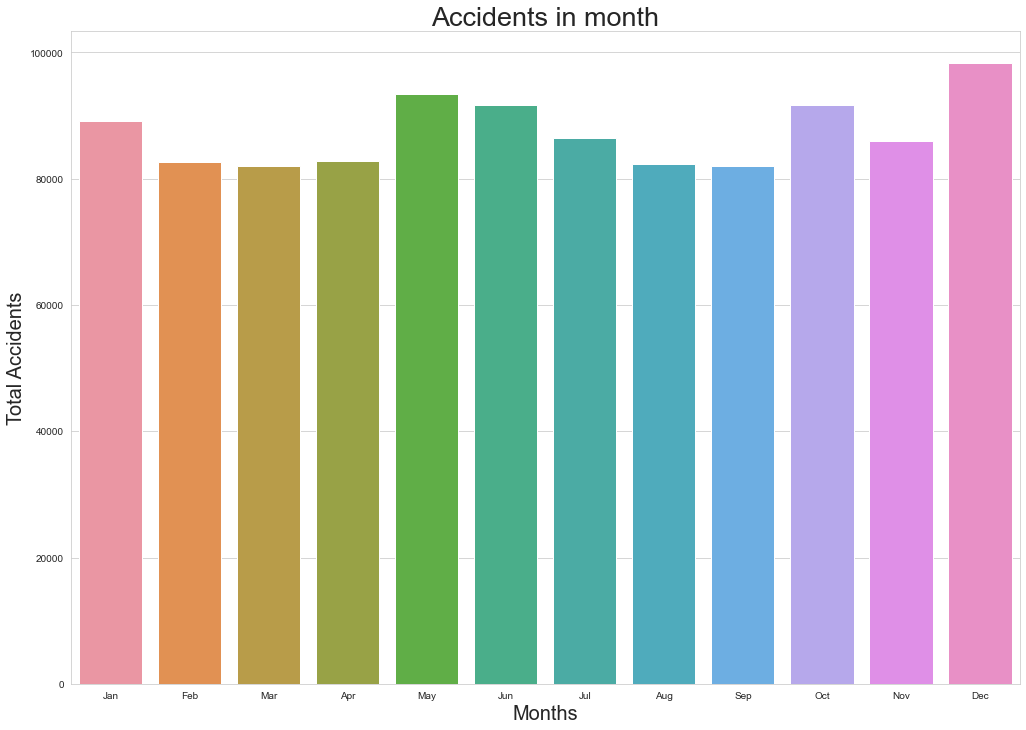

In [53]:
sns.set_style('whitegrid')
plt.figure(figsize=(17,12))

sns.barplot(x='month',
            y='accidents',
            data=month,
            order=month_order )

plt.title('Accidents in month', fontsize=27)
plt.xlabel('Months', fontsize=20)
plt.ylabel('Total Accidents', fontsize=20)

## Day

In [54]:
day_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

Day = pd.DataFrame(crash_date['Crash Day Of Week'].value_counts().reset_index())

Day.columns = ['day','accidents']

Day['day'].replace(['F','TH','TU','W','M','SA','S'],
                   ['Fri','Thu','Tue','Wed','Mon','Sun','Sat'],
                   inplace = True)

Day

,day,accidents
0,Fri,175227
1,Thu,159228
2,Tue,156871
3,Wed,155955
4,Mon,146559
5,Sun,141825
6,Sat,112910


Text(0, 0.5, 'Total Accidents')

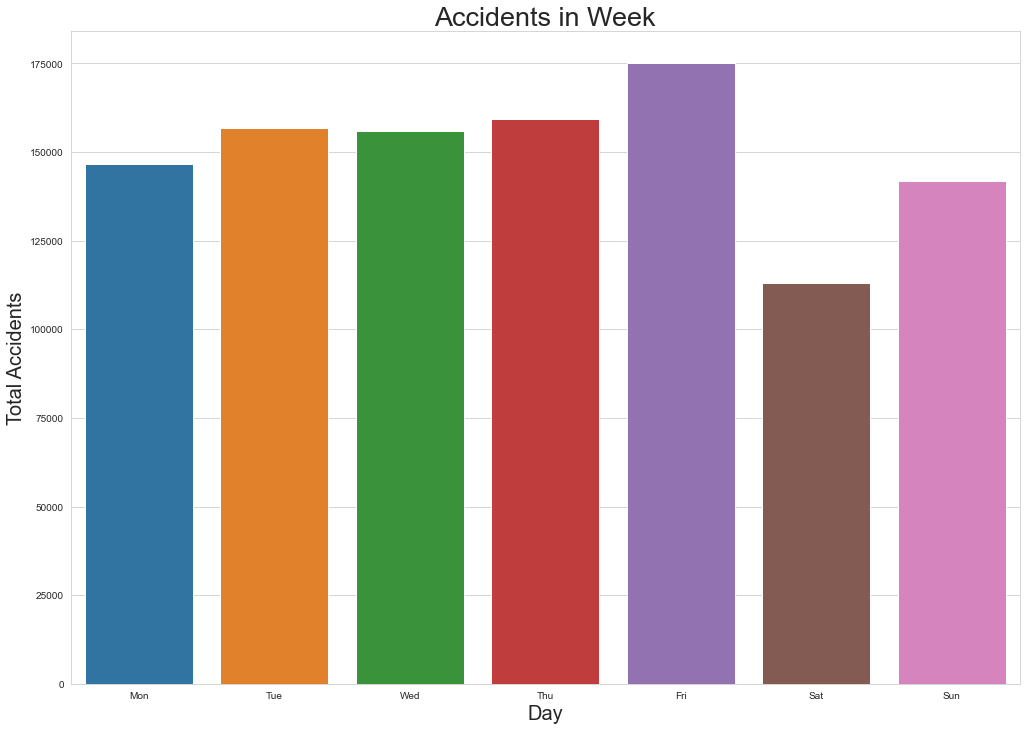

In [55]:
sns.set_style('whitegrid')
plt.figure(figsize=(17,12))

sns.barplot(x='day',
            y='accidents',
            data=Day,
            order=day_order)

plt.title('Accidents in Week', fontsize=27)
plt.xlabel('Day', fontsize=20)
plt.ylabel('Total Accidents', fontsize=20)

## Hour

In [56]:
crash_date['Crash Time'].unique()

array(['15', '11', '3', '1', '9', '16', '17', '14', '13', '7', '18', '8',
       '12', '23', '19', '6', '10', '22', '4', '20', '21', '2', '5', '  ',
       '0'], dtype=object)

In [57]:
crash_date['Crash Time'].replace('  ', '0',
                                 inplace=True)

crash_date['Crash Time'].unique()

D:\A\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


array(['15', '11', '3', '1', '9', '16', '17', '14', '13', '7', '18', '8',
       '12', '23', '19', '6', '10', '22', '4', '20', '21', '2', '5', '0'],
      dtype=object)

In [58]:
crash_date['Crash Time'] = crash_date['Crash Time'].astype(int)

<ipython-input-58-c5a03b1e711b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_date['Crash Time'] = crash_date['Crash Time'].astype(int)


In [59]:
Hour = pd.DataFrame(crash_date['Crash Time'].value_counts().reset_index())

Hour.columns = ['Crash Time','accidents']

Hour = Hour.sort_values(by='Crash Time',
                        ascending=True)
Hour

,Crash Time,accidents
23,0,7917
18,1,16361
19,2,15917
20,3,13327
22,4,10596
21,5,12730
17,6,20217
12,7,46305
7,8,63076
9,9,51006


Text(0, 0.5, 'Total Accidents')

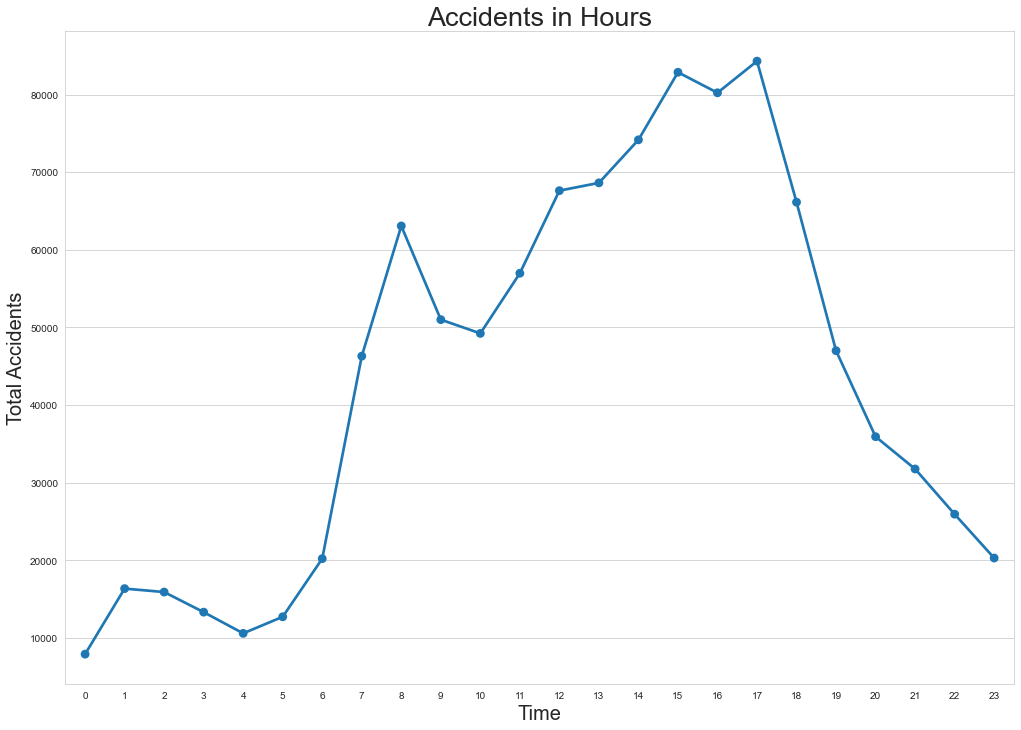

In [60]:
sns.set_style('whitegrid')
plt.figure(figsize=(17,12))

sns.pointplot(x='Crash Time',
              y='accidents',
              data=Hour)

plt.title('Accidents in Hours', fontsize=27)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Total Accidents', fontsize=20)